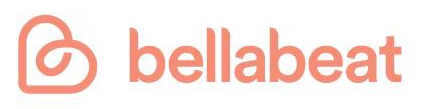

Bellabeat is a Silicon Valley fem-tech business, targeting a global health-conscious community. Develop wearables and accompanying products that monitor biometric and lifestyle data to help women better understand how their bodies work and make healthier choices.

Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company


# <span style="color:#ff9973"> Ask Phase </span>

#### Questions for the analysis

- What are some trends in smart device usage? 
- How could these trends apply to Bellabeat customers?
- How could these trends help influence Bellabeat marketing strategy?

#### Business task

Identify potential opportunities for growth and recommendations for the Bellabeat marketing strategy, improvement based on trends in smart device usage.

#### Stakeholders

-   Urška Sršen - Bellabeat cofounder and Chief Creative Officer
-   Sando Mur - Bellabeat cofounder and key member of Bellabeat executive team
-   Bellabeat Marketing Analytics team


# <span style="color:#ff9973"> Prepare Phase </span>

#### Content

FitBit Fitness Tracker Data

This [dataset](https://www.kaggle.com/datasets/arashnic/fitbit?select=Fitabase+Data+4.12.16-5.12.16) was generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring.

The dataset includes 18 csv files.
Each user has an ID. After analysis, only 30 distinct IDs were identified.
In addition to the small sample size, there are other problems that could lead to biased results, such as the lack of demographic information, and the fact that the sample is no longer up to date.


# <span style="color:#ff9973"> Process Phase </span>

Given the large amount of data in this case study, I will use R to be also able to create the visualisations of the data and consequently share my results with the stakeholders.

#### Installing packages and opening libraries



In [1]:

install.packages("tidyverse")
install.packages("lubridate")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("tidyr")
install.packages("here")
install.packages("skimr")
install.packages("janitor")
install.packages("webr")
install.packages("clock")
install.packages("ggpubr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘reprex’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘nloptr’, ‘pbkrtest’, ‘lme4’, ‘car’, ‘rstatix’, ‘rvg’, ‘devEMF’, ‘editDat

In [2]:

library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)
library(here)
library(skimr)
library(janitor)
library(webr)
library(clock)
library(ggpubr)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


here() starts at /kaggle/working


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘clock’


The following object is masked from ‘package:lubridate’:

    as_date




#### Import Datasets

**Activity**


In [3]:

activity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")


Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:

head(activity)


Id         ActivityDate TotalSteps TotalDistance TrackerDistance
1 1503960366 4/12/2016    13162      8.50          8.50           
2 1503960366 4/13/2016    10735      6.97          6.97           
3 1503960366 4/14/2016    10460      6.74          6.74           
4 1503960366 4/15/2016     9762      6.28          6.28           
5 1503960366 4/16/2016    12669      8.16          8.16           
6 1503960366 4/17/2016     9705      6.48          6.48           
  LoggedActivitiesDistance VeryActiveDistance ModeratelyActiveDistance
1 0                        1.88               0.55                    
2 0                        1.57               0.69                    
3 0                        2.44               0.40                    
4 0                        2.14               1.26                    
5 0                        2.71               0.41                    
6 0                        3.19               0.78                    
  LightActiveDistance SedentaryActiveDistance VeryActiveMinutes
1 6.06                0                       25               
2 4.71                0                       21               
3 3.91                0                       30               
4 2.83                0                       29               
5 5.04                0                       36               
6 2.51                0                       38               
  FairlyActiveMinutes LightlyActiveMinutes SedentaryMinutes Calories
1 13                  328                   728             1985    
2 19                  217                   776             1797    
3 11                  181                  1218             1776    
4 34                  209                   726             1745    
5 10                  221                   773             1863    
6 20                  164                   539             1728

In [5]:
str(activity)

spec_tbl_df [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 22

In [6]:
sum(is.na(activity))

[1] 0

In [7]:
sum(duplicated(activity))

[1] 0

**Heartrate**

In [8]:
heartrate <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")

Rows: 2483658 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Time
dbl (2): Id, Value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [9]:
head(heartrate)

Id         Time                 Value
1 2022484408 4/12/2016 7:21:00 AM  97  
2 2022484408 4/12/2016 7:21:05 AM 102  
3 2022484408 4/12/2016 7:21:10 AM 105  
4 2022484408 4/12/2016 7:21:20 AM 103  
5 2022484408 4/12/2016 7:21:25 AM 101  
6 2022484408 4/12/2016 7:22:05 AM  95

In [10]:
str(heartrate)

spec_tbl_df [2,483,658 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id   : num [1:2483658] 2.02e+09 2.02e+09 2.02e+09 2.02e+09 2.02e+09 ...
 $ Time : chr [1:2483658] "4/12/2016 7:21:00 AM" "4/12/2016 7:21:05 AM" "4/12/2016 7:21:10 AM" "4/12/2016 7:21:20 AM" ...
 $ Value: num [1:2483658] 97 102 105 103 101 95 91 93 94 93 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   Time = col_character(),
  ..   Value = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [11]:
sum(is.na(heartrate))

[1] 0

In [12]:
sum(duplicated(heartrate))

[1] 0

**Calories**

In [13]:
calories <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")

Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [14]:
head(calories)

Id         ActivityHour          Calories
1 1503960366 4/12/2016 12:00:00 AM 81      
2 1503960366 4/12/2016 1:00:00 AM  61      
3 1503960366 4/12/2016 2:00:00 AM  59      
4 1503960366 4/12/2016 3:00:00 AM  47      
5 1503960366 4/12/2016 4:00:00 AM  48      
6 1503960366 4/12/2016 5:00:00 AM  48

In [15]:
str(calories)

spec_tbl_df [22,099 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id          : num [1:22099] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr [1:22099] "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ Calories    : num [1:22099] 81 61 59 47 48 48 48 47 68 141 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityHour = col_character(),
  ..   Calories = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [16]:
sum(duplicated(calories))

[1] 0

**Intensities**

In [17]:
intensities <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")

Rows: 22099 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (3): Id, TotalIntensity, AverageIntensity

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [18]:
head(intensities)

Id         ActivityHour          TotalIntensity AverageIntensity
1 1503960366 4/12/2016 12:00:00 AM 20             0.333333        
2 1503960366 4/12/2016 1:00:00 AM   8             0.133333        
3 1503960366 4/12/2016 2:00:00 AM   7             0.116667        
4 1503960366 4/12/2016 3:00:00 AM   0             0.000000        
5 1503960366 4/12/2016 4:00:00 AM   0             0.000000        
6 1503960366 4/12/2016 5:00:00 AM   0             0.000000

In [19]:
str(intensities)

spec_tbl_df [22,099 × 4] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id              : num [1:22099] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour    : chr [1:22099] "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ TotalIntensity  : num [1:22099] 20 8 7 0 0 0 0 0 13 30 ...
 $ AverageIntensity: num [1:22099] 0.333 0.133 0.117 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityHour = col_character(),
  ..   TotalIntensity = col_double(),
  ..   AverageIntensity = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [20]:
sum(is.na(intensities))

[1] 0

In [21]:
sum(duplicated(intensities))

[1] 0

**Steps**

In [22]:
steps <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")

Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, StepTotal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [23]:
head(steps)

Id         ActivityHour          StepTotal
1 1503960366 4/12/2016 12:00:00 AM 373      
2 1503960366 4/12/2016 1:00:00 AM  160      
3 1503960366 4/12/2016 2:00:00 AM  151      
4 1503960366 4/12/2016 3:00:00 AM    0      
5 1503960366 4/12/2016 4:00:00 AM    0      
6 1503960366 4/12/2016 5:00:00 AM    0

In [24]:
str(steps)

spec_tbl_df [22,099 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id          : num [1:22099] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr [1:22099] "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ StepTotal   : num [1:22099] 373 160 151 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityHour = col_character(),
  ..   StepTotal = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [25]:
sum(is.na(steps))

[1] 0

In [26]:
sum(duplicated(steps))

[1] 0

**Sleep**

In [27]:
sleep <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [28]:
head(sleep)

Id         SleepDay              TotalSleepRecords TotalMinutesAsleep
1 1503960366 4/12/2016 12:00:00 AM 1                 327               
2 1503960366 4/13/2016 12:00:00 AM 2                 384               
3 1503960366 4/15/2016 12:00:00 AM 1                 412               
4 1503960366 4/16/2016 12:00:00 AM 2                 340               
5 1503960366 4/17/2016 12:00:00 AM 1                 700               
6 1503960366 4/19/2016 12:00:00 AM 1                 304               
  TotalTimeInBed
1 346           
2 407           
3 442           
4 367           
5 712           
6 320

In [29]:
str(sleep)

spec_tbl_df [413 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                : num [1:413] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr [1:413] "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : num [1:413] 1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: num [1:413] 327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : num [1:413] 346 407 442 367 712 320 377 364 384 449 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   SleepDay = col_character(),
  ..   TotalSleepRecords = col_double(),
  ..   TotalMinutesAsleep = col_double(),
  ..   TotalTimeInBed = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [30]:
sum(is.na(sleep))

[1] 0

In [31]:
sum(duplicated(sleep))

[1] 3

**Weight**

In [32]:
weight <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

Rows: 67 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
dbl (6): Id, WeightKg, WeightPounds, Fat, BMI, LogId
lgl (1): IsManualReport

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [33]:
head(weight)

Id         Date                  WeightKg WeightPounds Fat BMI  
1 1503960366 5/2/2016 11:59:59 PM   52.6    115.9631     22  22.65
2 1503960366 5/3/2016 11:59:59 PM   52.6    115.9631     NA  22.65
3 1927972279 4/13/2016 1:08:52 AM  133.5    294.3171     NA  47.54
4 2873212765 4/21/2016 11:59:59 PM  56.7    125.0021     NA  21.45
5 2873212765 5/12/2016 11:59:59 PM  57.3    126.3249     NA  21.69
6 4319703577 4/17/2016 11:59:59 PM  72.4    159.6147     25  27.45
  IsManualReport LogId       
1  TRUE          1.462234e+12
2  TRUE          1.462320e+12
3 FALSE          1.460510e+12
4  TRUE          1.461283e+12
5  TRUE          1.463098e+12
6  TRUE          1.460938e+12

In [34]:
str(weight)

spec_tbl_df [67 × 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id            : num [1:67] 1.50e+09 1.50e+09 1.93e+09 2.87e+09 2.87e+09 ...
 $ Date          : chr [1:67] "5/2/2016 11:59:59 PM" "5/3/2016 11:59:59 PM" "4/13/2016 1:08:52 AM" "4/21/2016 11:59:59 PM" ...
 $ WeightKg      : num [1:67] 52.6 52.6 133.5 56.7 57.3 ...
 $ WeightPounds  : num [1:67] 116 116 294 125 126 ...
 $ Fat           : num [1:67] 22 NA NA NA NA 25 NA NA NA NA ...
 $ BMI           : num [1:67] 22.6 22.6 47.5 21.5 21.7 ...
 $ IsManualReport: logi [1:67] TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ LogId         : num [1:67] 1.46e+12 1.46e+12 1.46e+12 1.46e+12 1.46e+12 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   Date = col_character(),
  ..   WeightKg = col_double(),
  ..   WeightPounds = col_double(),
  ..   Fat = col_double(),
  ..   BMI = col_double(),
  ..   IsManualReport = col_logical(),
  ..   LogId = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [35]:
sum(is.na(weight))

[1] 65

In [36]:
sum(duplicated(weight))

[1] 0

#### Fixing Formatting

I have detected some problems with the timestamp data. Before I can analyse such data, I need to convert it to date/time format and split it into date and time.


**Activity**

In [37]:
activity$ActivityDate=as.POSIXct(activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())
activity$date <- format(activity$ActivityDate, format = "%m/%d/%Y")
activity$ActivityDate=as.Date(activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())
activity$date=as.Date(activity$date, format="%m/%d/%Y")

In [38]:
class(activity$ActivityDate)

[1] "Date"

In [39]:
sum(is.na(activity))

[1] 0

In [40]:
activity <- activity[ , -2]

In [41]:
head(activity)

Id         TotalSteps TotalDistance TrackerDistance LoggedActivitiesDistance
1 1503960366 13162      8.50          8.50            0                       
2 1503960366 10735      6.97          6.97            0                       
3 1503960366 10460      6.74          6.74            0                       
4 1503960366  9762      6.28          6.28            0                       
5 1503960366 12669      8.16          8.16            0                       
6 1503960366  9705      6.48          6.48            0                       
  VeryActiveDistance ModeratelyActiveDistance LightActiveDistance
1 1.88               0.55                     6.06               
2 1.57               0.69                     4.71               
3 2.44               0.40                     3.91               
4 2.14               1.26                     2.83               
5 2.71               0.41                     5.04               
6 3.19               0.78                     2.51               
  SedentaryActiveDistance VeryActiveMinutes FairlyActiveMinutes
1 0                       25                13                 
2 0                       21                19                 
3 0                       30                11                 
4 0                       29                34                 
5 0                       36                10                 
6 0                       38                20                 
  LightlyActiveMinutes SedentaryMinutes Calories date      
1 328                   728             1985     2016-04-12
2 217                   776             1797     2016-04-13
3 181                  1218             1776     2016-04-14
4 209                   726             1745     2016-04-15
5 221                   773             1863     2016-04-16
6 164                   539             1728     2016-04-17

**Heartrate**

In [42]:
str(heartrate)

spec_tbl_df [2,483,658 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id   : num [1:2483658] 2.02e+09 2.02e+09 2.02e+09 2.02e+09 2.02e+09 ...
 $ Time : chr [1:2483658] "4/12/2016 7:21:00 AM" "4/12/2016 7:21:05 AM" "4/12/2016 7:21:10 AM" "4/12/2016 7:21:20 AM" ...
 $ Value: num [1:2483658] 97 102 105 103 101 95 91 93 94 93 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   Time = col_character(),
  ..   Value = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [43]:
heartrate <- heartrate %>%
  mutate(Time = parse_date_time(Time, "m/d/Y I:M:S p"))

In [44]:
class(heartrate$Time)

[1] "POSIXct" "POSIXt"

In [45]:
as.Date(as.POSIXct(heartrate$Time, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone))

[1] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
    [6] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
   [11] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
   [16] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
   [21] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
   [26] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
   [31] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
   [36] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
   [41] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
   [46] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
   [51] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
   [56] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
   [61] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
   [66] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
   [71] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
   [76] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
   [81] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
   [86] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
   [91] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
   [96] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [101] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [106] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [111] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [116] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [121] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [126] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [131] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [136] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [141] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [146] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [151] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [156] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [161] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [166] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [171] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [176] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [181] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [186] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [191] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [196] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [201] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [206] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [211] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [216] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [221] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [226] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [231] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [236] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [241] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [246] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [251] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [256] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [261] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [266] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
  [271] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2

In [46]:
heartrate$Date <- as.Date(heartrate$Time)

In [47]:
class(heartrate$Time)

[1] "POSIXct" "POSIXt"

In [48]:
extract(heartrate, Time, into = c("date", "time"), "^(\\S+)\\s+(.*)")

Id         date       time     Value Date      
1       2022484408 2016-04-12 07:21:00  97   2016-04-12
2       2022484408 2016-04-12 07:21:05 102   2016-04-12
3       2022484408 2016-04-12 07:21:10 105   2016-04-12
4       2022484408 2016-04-12 07:21:20 103   2016-04-12
5       2022484408 2016-04-12 07:21:25 101   2016-04-12
6       2022484408 2016-04-12 07:22:05  95   2016-04-12
7       2022484408 2016-04-12 07:22:10  91   2016-04-12
8       2022484408 2016-04-12 07:22:15  93   2016-04-12
9       2022484408 2016-04-12 07:22:20  94   2016-04-12
10      2022484408 2016-04-12 07:22:25  93   2016-04-12
11      2022484408 2016-04-12 07:22:35  92   2016-04-12
12      2022484408 2016-04-12 07:22:40  89   2016-04-12
13      2022484408 2016-04-12 07:22:50  83   2016-04-12
14      2022484408 2016-04-12 07:22:55  61   2016-04-12
15      2022484408 2016-04-12 07:23:00  60   2016-04-12
16      2022484408 2016-04-12 07:23:10  61   2016-04-12
17      2022484408 2016-04-12 07:23:25  61   2016-04-12
18      2022484408 2016-04-12 07:23:30  57   2016-04-12
19      2022484408 2016-04-12 07:23:40  54   2016-04-12
20      2022484408 2016-04-12 07:23:50  55   2016-04-12
21      2022484408 2016-04-12 07:24:00  58   2016-04-12
22      2022484408 2016-04-12 07:24:10  60   2016-04-12
23      2022484408 2016-04-12 07:24:20  59   2016-04-12
24      2022484408 2016-04-12 07:24:30  57   2016-04-12
25      2022484408 2016-04-12 07:24:40  56   2016-04-12
26      2022484408 2016-04-12 07:24:50  58   2016-04-12
27      2022484408 2016-04-12 07:25:05  57   2016-04-12
28      2022484408 2016-04-12 07:25:10  58   2016-04-12
29      2022484408 2016-04-12 07:25:15  60   2016-04-12
30      2022484408 2016-04-12 07:25:20  60   2016-04-12
⋮       ⋮          ⋮          ⋮        ⋮     ⋮         
2483629 8877689391 2016-05-12 14:40:23 56    2016-05-12
2483630 8877689391 2016-05-12 14:40:33 57    2016-05-12
2483631 8877689391 2016-05-12 14:40:38 56    2016-05-12
2483632 8877689391 2016-05-12 14:40:43 58    2016-05-12
2483633 8877689391 2016-05-12 14:40:48 56    2016-05-12
2483634 8877689391 2016-05-12 14:40:53 55    2016-05-12
2483635 8877689391 2016-05-12 14:40:58 55    2016-05-12
2483636 8877689391 2016-05-12 14:41:13 55    2016-05-12
2483637 8877689391 2016-05-12 14:41:18 56    2016-05-12
2483638 8877689391 2016-05-12 14:41:28 62    2016-05-12
2483639 8877689391 2016-05-12 14:41:38 60    2016-05-12
2483640 8877689391 2016-05-12 14:41:43 59    2016-05-12
2483641 8877689391 2016-05-12 14:41:48 57    2016-05-12
2483642 8877689391 2016-05-12 14:41:58 56    2016-05-12
2483643 8877689391 2016-05-12 14:42:03 57    2016-05-12
2483644 8877689391 2016-05-12 14:42:08 55    2016-05-12
2483645 8877689391 2016-05-12 14:42:13 55    2016-05-12
2483646 8877689391 2016-05-12 14:42:28 55    2016-05-12
2483647 8877689391 2016-05-12 14:42:33 56    2016-05-12
2483648 8877689391 2016-05-12 14:42:43 57    2016-05-12
2483649 8877689391 2016-05-12 14:42:58 57    2016-05-12
2483650 8877689391 2016-05-12 14:43:13 57    2016-05-12
2483651 8877689391 2016-05-12 14:43:18 58    2016-05-12
2483652 8877689391 2016-05-12 14:43:23 59    2016-05-12
2483653 8877689391 2016-05-12 14:43:38 58    2016-05-12
2483654 8877689391 2016-05-12 14:43:53 57    2016-05-12
2483655 8877689391 2016-05-12 14:43:58 56    2016-05-12
2483656 8877689391 2016-05-12 14:44:03 55    2016-05-12
2483657 8877689391 2016-05-12 14:44:18 55    2016-05-12
2483658 8877689391 2016-05-12 14:44:28 56    2016-05-12

In [49]:
sum(is.na(heartrate))

[1] 0

In [50]:
heartrate <- extract(heartrate, Time, into = c("date", "time"), "^(\\S+)\\s+(.*)")

In [51]:
heartrate <- heartrate[ , -2]

In [52]:
head(heartrate)

Id         time     Value Date      
1 2022484408 07:21:00  97   2016-04-12
2 2022484408 07:21:05 102   2016-04-12
3 2022484408 07:21:10 105   2016-04-12
4 2022484408 07:21:20 103   2016-04-12
5 2022484408 07:21:25 101   2016-04-12
6 2022484408 07:22:05  95   2016-04-12

**Calories**

In [53]:
calories <- calories %>%
  mutate(ActivityHour = parse_date_time(ActivityHour, "m/d/Y I:M:S p"))

In [54]:
class(calories$ActivityHour)

[1] "POSIXct" "POSIXt"

In [55]:
sum(is.na(calories))

[1] 0

In [56]:
as.Date(as.POSIXct(calories$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone))

[1] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
    [6] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
   [11] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
   [16] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
   [21] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-13"
   [26] "2016-04-13" "2016-04-13" "2016-04-13" "2016-04-13" "2016-04-13"
   [31] "2016-04-13" "2016-04-13" "2016-04-13" "2016-04-13" "2016-04-13"
   [36] "2016-04-13" "2016-04-13" "2016-04-13" "2016-04-13" "2016-04-13"
   [41] "2016-04-13" "2016-04-13" "2016-04-13" "2016-04-13" "2016-04-13"
   [46] "2016-04-13" "2016-04-13" "2016-04-13" "2016-04-14" "2016-04-14"
   [51] "2016-04-14" "2016-04-14" "2016-04-14" "2016-04-14" "2016-04-14"
   [56] "2016-04-14" "2016-04-14" "2016-04-14" "2016-04-14" "2016-04-14"
   [61] "2016-04-14" "2016-04-14" "2016-04-14" "2016-04-14" "2016-04-14"
   [66] "2016-04-14" "2016-04-14" "2016-04-14" "2016-04-14" "2016-04-14"
   [71] "2016-04-14" "2016-04-14" "2016-04-15" "2016-04-15" "2016-04-15"
   [76] "2016-04-15" "2016-04-15" "2016-04-15" "2016-04-15" "2016-04-15"
   [81] "2016-04-15" "2016-04-15" "2016-04-15" "2016-04-15" "2016-04-15"
   [86] "2016-04-15" "2016-04-15" "2016-04-15" "2016-04-15" "2016-04-15"
   [91] "2016-04-15" "2016-04-15" "2016-04-15" "2016-04-15" "2016-04-15"
   [96] "2016-04-15" "2016-04-16" "2016-04-16" "2016-04-16" "2016-04-16"
  [101] "2016-04-16" "2016-04-16" "2016-04-16" "2016-04-16" "2016-04-16"
  [106] "2016-04-16" "2016-04-16" "2016-04-16" "2016-04-16" "2016-04-16"
  [111] "2016-04-16" "2016-04-16" "2016-04-16" "2016-04-16" "2016-04-16"
  [116] "2016-04-16" "2016-04-16" "2016-04-16" "2016-04-16" "2016-04-16"
  [121] "2016-04-17" "2016-04-17" "2016-04-17" "2016-04-17" "2016-04-17"
  [126] "2016-04-17" "2016-04-17" "2016-04-17" "2016-04-17" "2016-04-17"
  [131] "2016-04-17" "2016-04-17" "2016-04-17" "2016-04-17" "2016-04-17"
  [136] "2016-04-17" "2016-04-17" "2016-04-17" "2016-04-17" "2016-04-17"
  [141] "2016-04-17" "2016-04-17" "2016-04-17" "2016-04-17" "2016-04-18"
  [146] "2016-04-18" "2016-04-18" "2016-04-18" "2016-04-18" "2016-04-18"
  [151] "2016-04-18" "2016-04-18" "2016-04-18" "2016-04-18" "2016-04-18"
  [156] "2016-04-18" "2016-04-18" "2016-04-18" "2016-04-18" "2016-04-18"
  [161] "2016-04-18" "2016-04-18" "2016-04-18" "2016-04-18" "2016-04-18"
  [166] "2016-04-18" "2016-04-18" "2016-04-18" "2016-04-19" "2016-04-19"
  [171] "2016-04-19" "2016-04-19" "2016-04-19" "2016-04-19" "2016-04-19"
  [176] "2016-04-19" "2016-04-19" "2016-04-19" "2016-04-19" "2016-04-19"
  [181] "2016-04-19" "2016-04-19" "2016-04-19" "2016-04-19" "2016-04-19"
  [186] "2016-04-19" "2016-04-19" "2016-04-19" "2016-04-19" "2016-04-19"
  [191] "2016-04-19" "2016-04-19" "2016-04-20" "2016-04-20" "2016-04-20"
  [196] "2016-04-20" "2016-04-20" "2016-04-20" "2016-04-20" "2016-04-20"
  [201] "2016-04-20" "2016-04-20" "2016-04-20" "2016-04-20" "2016-04-20"
  [206] "2016-04-20" "2016-04-20" "2016-04-20" "2016-04-20" "2016-04-20"
  [211] "2016-04-20" "2016-04-20" "2016-04-20" "2016-04-20" "2016-04-20"
  [216] "2016-04-20" "2016-04-21" "2016-04-21" "2016-04-21" "2016-04-21"
  [221] "2016-04-21" "2016-04-21" "2016-04-21" "2016-04-21" "2016-04-21"
  [226] "2016-04-21" "2016-04-21" "2016-04-21" "2016-04-21" "2016-04-21"
  [231] "2016-04-21" "2016-04-21" "2016-04-21" "2016-04-21" "2016-04-21"
  [236] "2016-04-21" "2016-04-21" "2016-04-21" "2016-04-21" "2016-04-21"
  [241] "2016-04-22" "2016-04-22" "2016-04-22" "2016-04-22" "2016-04-22"
  [246] "2016-04-22" "2016-04-22" "2016-04-22" "2016-04-22" "2016-04-22"
  [251] "2016-04-22" "2016-04-22" "2016-04-22" "2016-04-22" "2016-04-22"
  [256] "2016-04-22" "2016-04-22" "2016-04-22" "2016-04-22" "2016-04-22"
  [261] "2016-04-22" "2016-04-22" "2016-04-22" "2016-04-22" "2016-04-23"
  [266] "2016-04-23" "2016-04-23" "2016-04-23" "2016-04-23" "2016-04-23"
  [271] "2016-04-23" "2016-04-23" "2016-04-23" "2016-04-23" "2

In [57]:
calories$Date <- as.Date(calories$ActivityHour)

In [58]:
calories <- extract(calories, ActivityHour, into = c("date", "time"), "^(\\S+)\\s+(.*)")

In [59]:
calories <- calories[ , -2]

In [60]:
head(calories)

Id         time     Calories Date      
1 1503960366 00:00:00 81       2016-04-12
2 1503960366 01:00:00 61       2016-04-12
3 1503960366 02:00:00 59       2016-04-12
4 1503960366 03:00:00 47       2016-04-12
5 1503960366 04:00:00 48       2016-04-12
6 1503960366 05:00:00 48       2016-04-12

**Intensities**

In [61]:
intensities <- intensities %>%
  mutate(ActivityHour = parse_date_time(ActivityHour, "m/d/Y I:M:S p"))

In [62]:
class(intensities$ActivityHour)

[1] "POSIXct" "POSIXt"

In [63]:
as.Date(as.POSIXct(intensities$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone))

[1] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
    [6] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
   [11] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
   [16] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
   [21] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-13"
   [26] "2016-04-13" "2016-04-13" "2016-04-13" "2016-04-13" "2016-04-13"
   [31] "2016-04-13" "2016-04-13" "2016-04-13" "2016-04-13" "2016-04-13"
   [36] "2016-04-13" "2016-04-13" "2016-04-13" "2016-04-13" "2016-04-13"
   [41] "2016-04-13" "2016-04-13" "2016-04-13" "2016-04-13" "2016-04-13"
   [46] "2016-04-13" "2016-04-13" "2016-04-13" "2016-04-14" "2016-04-14"
   [51] "2016-04-14" "2016-04-14" "2016-04-14" "2016-04-14" "2016-04-14"
   [56] "2016-04-14" "2016-04-14" "2016-04-14" "2016-04-14" "2016-04-14"
   [61] "2016-04-14" "2016-04-14" "2016-04-14" "2016-04-14" "2016-04-14"
   [66] "2016-04-14" "2016-04-14" "2016-04-14" "2016-04-14" "2016-04-14"
   [71] "2016-04-14" "2016-04-14" "2016-04-15" "2016-04-15" "2016-04-15"
   [76] "2016-04-15" "2016-04-15" "2016-04-15" "2016-04-15" "2016-04-15"
   [81] "2016-04-15" "2016-04-15" "2016-04-15" "2016-04-15" "2016-04-15"
   [86] "2016-04-15" "2016-04-15" "2016-04-15" "2016-04-15" "2016-04-15"
   [91] "2016-04-15" "2016-04-15" "2016-04-15" "2016-04-15" "2016-04-15"
   [96] "2016-04-15" "2016-04-16" "2016-04-16" "2016-04-16" "2016-04-16"
  [101] "2016-04-16" "2016-04-16" "2016-04-16" "2016-04-16" "2016-04-16"
  [106] "2016-04-16" "2016-04-16" "2016-04-16" "2016-04-16" "2016-04-16"
  [111] "2016-04-16" "2016-04-16" "2016-04-16" "2016-04-16" "2016-04-16"
  [116] "2016-04-16" "2016-04-16" "2016-04-16" "2016-04-16" "2016-04-16"
  [121] "2016-04-17" "2016-04-17" "2016-04-17" "2016-04-17" "2016-04-17"
  [126] "2016-04-17" "2016-04-17" "2016-04-17" "2016-04-17" "2016-04-17"
  [131] "2016-04-17" "2016-04-17" "2016-04-17" "2016-04-17" "2016-04-17"
  [136] "2016-04-17" "2016-04-17" "2016-04-17" "2016-04-17" "2016-04-17"
  [141] "2016-04-17" "2016-04-17" "2016-04-17" "2016-04-17" "2016-04-18"
  [146] "2016-04-18" "2016-04-18" "2016-04-18" "2016-04-18" "2016-04-18"
  [151] "2016-04-18" "2016-04-18" "2016-04-18" "2016-04-18" "2016-04-18"
  [156] "2016-04-18" "2016-04-18" "2016-04-18" "2016-04-18" "2016-04-18"
  [161] "2016-04-18" "2016-04-18" "2016-04-18" "2016-04-18" "2016-04-18"
  [166] "2016-04-18" "2016-04-18" "2016-04-18" "2016-04-19" "2016-04-19"
  [171] "2016-04-19" "2016-04-19" "2016-04-19" "2016-04-19" "2016-04-19"
  [176] "2016-04-19" "2016-04-19" "2016-04-19" "2016-04-19" "2016-04-19"
  [181] "2016-04-19" "2016-04-19" "2016-04-19" "2016-04-19" "2016-04-19"
  [186] "2016-04-19" "2016-04-19" "2016-04-19" "2016-04-19" "2016-04-19"
  [191] "2016-04-19" "2016-04-19" "2016-04-20" "2016-04-20" "2016-04-20"
  [196] "2016-04-20" "2016-04-20" "2016-04-20" "2016-04-20" "2016-04-20"
  [201] "2016-04-20" "2016-04-20" "2016-04-20" "2016-04-20" "2016-04-20"
  [206] "2016-04-20" "2016-04-20" "2016-04-20" "2016-04-20" "2016-04-20"
  [211] "2016-04-20" "2016-04-20" "2016-04-20" "2016-04-20" "2016-04-20"
  [216] "2016-04-20" "2016-04-21" "2016-04-21" "2016-04-21" "2016-04-21"
  [221] "2016-04-21" "2016-04-21" "2016-04-21" "2016-04-21" "2016-04-21"
  [226] "2016-04-21" "2016-04-21" "2016-04-21" "2016-04-21" "2016-04-21"
  [231] "2016-04-21" "2016-04-21" "2016-04-21" "2016-04-21" "2016-04-21"
  [236] "2016-04-21" "2016-04-21" "2016-04-21" "2016-04-21" "2016-04-21"
  [241] "2016-04-22" "2016-04-22" "2016-04-22" "2016-04-22" "2016-04-22"
  [246] "2016-04-22" "2016-04-22" "2016-04-22" "2016-04-22" "2016-04-22"
  [251] "2016-04-22" "2016-04-22" "2016-04-22" "2016-04-22" "2016-04-22"
  [256] "2016-04-22" "2016-04-22" "2016-04-22" "2016-04-22" "2016-04-22"
  [261] "2016-04-22" "2016-04-22" "2016-04-22" "2016-04-22" "2016-04-23"
  [266] "2016-04-23" "2016-04-23" "2016-04-23" "2016-04-23" "2016-04-23"
  [271] "2016-04-23" "2016-04-23" "2016-04-23" "2016-04-23" "2

In [64]:
intensities$Date <- as.Date(intensities$ActivityHour)

In [65]:
intensities <- extract(intensities, ActivityHour, into = c("date", "time"), "^(\\S+)\\s+(.*)")

In [66]:
sum(is.na(intensities))

[1] 0

In [67]:
intensities <- intensities[ , -2]

In [68]:
head(intensities)

Id         time     TotalIntensity AverageIntensity Date      
1 1503960366 00:00:00 20             0.333333         2016-04-12
2 1503960366 01:00:00  8             0.133333         2016-04-12
3 1503960366 02:00:00  7             0.116667         2016-04-12
4 1503960366 03:00:00  0             0.000000         2016-04-12
5 1503960366 04:00:00  0             0.000000         2016-04-12
6 1503960366 05:00:00  0             0.000000         2016-04-12

**Steps**

In [69]:
steps <- steps %>%
  mutate(ActivityHour = parse_date_time(ActivityHour, "m/d/Y I:M:S p"))

In [70]:
class(steps$ActivityHour)

[1] "POSIXct" "POSIXt"

In [71]:
as.Date(as.POSIXct(steps$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone))

[1] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
    [6] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
   [11] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
   [16] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12"
   [21] "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-13"
   [26] "2016-04-13" "2016-04-13" "2016-04-13" "2016-04-13" "2016-04-13"
   [31] "2016-04-13" "2016-04-13" "2016-04-13" "2016-04-13" "2016-04-13"
   [36] "2016-04-13" "2016-04-13" "2016-04-13" "2016-04-13" "2016-04-13"
   [41] "2016-04-13" "2016-04-13" "2016-04-13" "2016-04-13" "2016-04-13"
   [46] "2016-04-13" "2016-04-13" "2016-04-13" "2016-04-14" "2016-04-14"
   [51] "2016-04-14" "2016-04-14" "2016-04-14" "2016-04-14" "2016-04-14"
   [56] "2016-04-14" "2016-04-14" "2016-04-14" "2016-04-14" "2016-04-14"
   [61] "2016-04-14" "2016-04-14" "2016-04-14" "2016-04-14" "2016-04-14"
   [66] "2016-04-14" "2016-04-14" "2016-04-14" "2016-04-14" "2016-04-14"
   [71] "2016-04-14" "2016-04-14" "2016-04-15" "2016-04-15" "2016-04-15"
   [76] "2016-04-15" "2016-04-15" "2016-04-15" "2016-04-15" "2016-04-15"
   [81] "2016-04-15" "2016-04-15" "2016-04-15" "2016-04-15" "2016-04-15"
   [86] "2016-04-15" "2016-04-15" "2016-04-15" "2016-04-15" "2016-04-15"
   [91] "2016-04-15" "2016-04-15" "2016-04-15" "2016-04-15" "2016-04-15"
   [96] "2016-04-15" "2016-04-16" "2016-04-16" "2016-04-16" "2016-04-16"
  [101] "2016-04-16" "2016-04-16" "2016-04-16" "2016-04-16" "2016-04-16"
  [106] "2016-04-16" "2016-04-16" "2016-04-16" "2016-04-16" "2016-04-16"
  [111] "2016-04-16" "2016-04-16" "2016-04-16" "2016-04-16" "2016-04-16"
  [116] "2016-04-16" "2016-04-16" "2016-04-16" "2016-04-16" "2016-04-16"
  [121] "2016-04-17" "2016-04-17" "2016-04-17" "2016-04-17" "2016-04-17"
  [126] "2016-04-17" "2016-04-17" "2016-04-17" "2016-04-17" "2016-04-17"
  [131] "2016-04-17" "2016-04-17" "2016-04-17" "2016-04-17" "2016-04-17"
  [136] "2016-04-17" "2016-04-17" "2016-04-17" "2016-04-17" "2016-04-17"
  [141] "2016-04-17" "2016-04-17" "2016-04-17" "2016-04-17" "2016-04-18"
  [146] "2016-04-18" "2016-04-18" "2016-04-18" "2016-04-18" "2016-04-18"
  [151] "2016-04-18" "2016-04-18" "2016-04-18" "2016-04-18" "2016-04-18"
  [156] "2016-04-18" "2016-04-18" "2016-04-18" "2016-04-18" "2016-04-18"
  [161] "2016-04-18" "2016-04-18" "2016-04-18" "2016-04-18" "2016-04-18"
  [166] "2016-04-18" "2016-04-18" "2016-04-18" "2016-04-19" "2016-04-19"
  [171] "2016-04-19" "2016-04-19" "2016-04-19" "2016-04-19" "2016-04-19"
  [176] "2016-04-19" "2016-04-19" "2016-04-19" "2016-04-19" "2016-04-19"
  [181] "2016-04-19" "2016-04-19" "2016-04-19" "2016-04-19" "2016-04-19"
  [186] "2016-04-19" "2016-04-19" "2016-04-19" "2016-04-19" "2016-04-19"
  [191] "2016-04-19" "2016-04-19" "2016-04-20" "2016-04-20" "2016-04-20"
  [196] "2016-04-20" "2016-04-20" "2016-04-20" "2016-04-20" "2016-04-20"
  [201] "2016-04-20" "2016-04-20" "2016-04-20" "2016-04-20" "2016-04-20"
  [206] "2016-04-20" "2016-04-20" "2016-04-20" "2016-04-20" "2016-04-20"
  [211] "2016-04-20" "2016-04-20" "2016-04-20" "2016-04-20" "2016-04-20"
  [216] "2016-04-20" "2016-04-21" "2016-04-21" "2016-04-21" "2016-04-21"
  [221] "2016-04-21" "2016-04-21" "2016-04-21" "2016-04-21" "2016-04-21"
  [226] "2016-04-21" "2016-04-21" "2016-04-21" "2016-04-21" "2016-04-21"
  [231] "2016-04-21" "2016-04-21" "2016-04-21" "2016-04-21" "2016-04-21"
  [236] "2016-04-21" "2016-04-21" "2016-04-21" "2016-04-21" "2016-04-21"
  [241] "2016-04-22" "2016-04-22" "2016-04-22" "2016-04-22" "2016-04-22"
  [246] "2016-04-22" "2016-04-22" "2016-04-22" "2016-04-22" "2016-04-22"
  [251] "2016-04-22" "2016-04-22" "2016-04-22" "2016-04-22" "2016-04-22"
  [256] "2016-04-22" "2016-04-22" "2016-04-22" "2016-04-22" "2016-04-22"
  [261] "2016-04-22" "2016-04-22" "2016-04-22" "2016-04-22" "2016-04-23"
  [266] "2016-04-23" "2016-04-23" "2016-04-23" "2016-04-23" "2016-04-23"
  [271] "2016-04-23" "2016-04-23" "2016-04-23" "2016-04-23" "2

In [72]:
steps$Date <- as.Date(steps$ActivityHour)

In [73]:
steps <- extract(steps, ActivityHour, into = c("date", "time"), "^(\\S+)\\s+(.*)")

In [74]:
 steps<- steps[ , -2]

In [75]:
head(steps)

Id         time     StepTotal Date      
1 1503960366 00:00:00 373       2016-04-12
2 1503960366 01:00:00 160       2016-04-12
3 1503960366 02:00:00 151       2016-04-12
4 1503960366 03:00:00   0       2016-04-12
5 1503960366 04:00:00   0       2016-04-12
6 1503960366 05:00:00   0       2016-04-12

**Sleep**

In [76]:
sleep <- sleep %>%
  mutate(SleepDay = parse_date_time(SleepDay, "m/d/Y I:M:S p"))

In [77]:
as.Date(as.POSIXct(sleep$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone))

[1] "2016-04-12" "2016-04-13" "2016-04-15" "2016-04-16" "2016-04-17"
  [6] "2016-04-19" "2016-04-20" "2016-04-21" "2016-04-23" "2016-04-24"
 [11] "2016-04-25" "2016-04-26" "2016-04-28" "2016-04-29" "2016-04-30"
 [16] "2016-05-01" "2016-05-02" "2016-05-03" "2016-05-05" "2016-05-06"
 [21] "2016-05-07" "2016-05-08" "2016-05-09" "2016-05-10" "2016-05-11"
 [26] "2016-04-29" "2016-04-30" "2016-05-02" "2016-05-08" "2016-04-15"
 [31] "2016-04-30" "2016-05-01" "2016-04-12" "2016-04-13" "2016-04-15"
 [36] "2016-04-26" "2016-04-28" "2016-04-12" "2016-04-13" "2016-04-14"
 [41] "2016-04-15" "2016-04-16" "2016-04-17" "2016-04-19" "2016-04-20"
 [46] "2016-04-21" "2016-04-22" "2016-04-23" "2016-04-24" "2016-04-25"
 [51] "2016-04-27" "2016-04-28" "2016-04-29" "2016-04-30" "2016-05-01"
 [56] "2016-05-02" "2016-05-04" "2016-05-05" "2016-05-06" "2016-05-07"
 [61] "2016-05-08" "2016-05-09" "2016-05-10" "2016-05-11" "2016-05-12"
 [66] "2016-04-23" "2016-04-13" "2016-04-14" "2016-04-15" "2016-04-17"
 [71] "2016-04-18" "2016-04-19" "2016-04-21" "2016-04-22" "2016-04-23"
 [76] "2016-04-24" "2016-04-25" "2016-04-26" "2016-04-27" "2016-04-28"
 [81] "2016-04-29" "2016-04-12" "2016-04-13" "2016-04-14" "2016-04-15"
 [86] "2016-04-16" "2016-04-17" "2016-04-18" "2016-04-19" "2016-04-20"
 [91] "2016-04-21" "2016-04-22" "2016-04-23" "2016-04-24" "2016-04-25"
 [96] "2016-04-26" "2016-04-27" "2016-04-28" "2016-04-29" "2016-04-30"
[101] "2016-05-01" "2016-05-02" "2016-05-03" "2016-05-04" "2016-05-05"
[106] "2016-05-06" "2016-05-07" "2016-05-08" "2016-05-10" "2016-04-12"
[111] "2016-04-16" "2016-05-03" "2016-05-04" "2016-05-05" "2016-05-06"
[116] "2016-05-08" "2016-05-10" "2016-04-14" "2016-04-15" "2016-04-16"
[121] "2016-04-18" "2016-04-19" "2016-04-20" "2016-04-21" "2016-04-22"
[126] "2016-04-23" "2016-04-24" "2016-04-25" "2016-04-26" "2016-04-27"
[131] "2016-04-28" "2016-04-29" "2016-04-30" "2016-05-01" "2016-05-02"
[136] "2016-05-03" "2016-05-06" "2016-05-07" "2016-05-08" "2016-05-09"
[141] "2016-05-10" "2016-05-11" "2016-05-12" "2016-04-15" "2016-04-16"
[146] "2016-04-17" "2016-04-18" "2016-04-19" "2016-04-20" "2016-04-21"
[151] "2016-04-22" "2016-04-23" "2016-04-24" "2016-04-26" "2016-04-27"
[156] "2016-04-28" "2016-04-30" "2016-05-01" "2016-05-02" "2016-05-04"
[161] "2016-05-05" "2016-05-05" "2016-05-07" "2016-05-08" "2016-05-09"
[166] "2016-05-10" "2016-05-11" "2016-04-12" "2016-04-13" "2016-04-14"
[171] "2016-04-15" "2016-04-16" "2016-04-17" "2016-04-19" "2016-04-20"
[176] "2016-04-21" "2016-04-22" "2016-04-25" "2016-04-26" "2016-04-27"
[181] "2016-04-28" "2016-04-29" "2016-04-30" "2016-05-01" "2016-05-02"
[186] "2016-05-03" "2016-05-04" "2016-05-05" "2016-05-06" "2016-05-07"
[191] "2016-05-08" "2016-05-09" "2016-05-10" "2016-05-11" "2016-05-12"
[196] "2016-04-21" "2016-04-26" "2016-04-29" "2016-05-01" "2016-05-08"
[201] "2016-04-12" "2016-04-13" "2016-04-14" "2016-04-15" "2016-04-16"
[206] "2016-04-17" "2016-04-18" "2016-04-19" "2016-04-20" "2016-04-21"
[211] "2016-04-23" "2016-04-24" "2016-04-25" "2016-04-26" "2016-04-27"
[216] "2016-04-28" "2016-04-29" "2016-04-30" "2016-05-03" "2016-05-04"
[221] "2016-05-05" "2016-05-06" "2016-05-07" "2016-05-07" "2016-05-09"
[226] "2016-05-10" "2016-05-11" "2016-05-12" "2016-04-12" "2016-04-13"
[231] "2016-04-14" "2016-04-15" "2016-04-16" "2016-04-17" "2016-04-18"
[236] "2016-04-19" "2016-04-20" "2016-04-21" "2016-04-22" "2016-04-23"
[241] "2016-04-24" "2016-04-25" "2016-04-26" "2016-04-27" "2016-04-28"
[246] "2016-04-29" "2016-04-30" "2016-05-01" "2016-05-02" "2016-05-03"
[251] "2016-05-04" "2016-05-05" "2016-05-06" "2016-05-07" "2016-05-08"
[256] "2016-05-09" "2016-05-10" "2016-05-11" "2016-05-12" "2016-04-12"
[261] "2016-04-13" "2016-04-14" "2016-04-15" "2016-04-16" "2016-04-17"
[266] "2016-04-18" "2016-04-19" "2016-04-20" "2016-04-21" "2016-04-22"
[271] "2016-04-23" "2016-04-24" "2016-04-25" "2016-04-26" "2016-04-27"
[276] "2016-04-28" "2016-04-29" "2016-04-30" "2016-05-01" "2016-05-02"
[281] "2016-05-03" "2016-0

In [78]:
sleep$Date <- as.Date(sleep$SleepDay)

In [79]:
sleep <- sleep[ , -2]

In [80]:
head(sleep)

Id         TotalSleepRecords TotalMinutesAsleep TotalTimeInBed Date      
1 1503960366 1                 327                346            2016-04-12
2 1503960366 2                 384                407            2016-04-13
3 1503960366 1                 412                442            2016-04-15
4 1503960366 2                 340                367            2016-04-16
5 1503960366 1                 700                712            2016-04-17
6 1503960366 1                 304                320            2016-04-19

#### Cleaning data



**Sleep dataset** : 3 duplicate values were identified and have been removed.

In [81]:
which(duplicated(sleep))

[1] 162 224 381

In [82]:
sleep <- sleep[!duplicated(sleep),]

In [83]:
sum(duplicated(sleep))

[1] 0

**Weight dataset**: Given the large number of missing data, I have decided to delete the column "Fat".

In [84]:
sum(is.na(weight))

[1] 65

Before merge some of the datsets, let's make sure they have the same syntax and format. In this case, let's change the format to lowercase.


In [85]:
clean_names(activity)
activity<- rename_with(activity, tolower)
clean_names(heartrate)
heartrate <- rename_with(heartrate, tolower)
clean_names(calories)
calories<- rename_with(calories, tolower)
clean_names(intensities)
intensities<- rename_with(intensities, tolower)
clean_names(steps)
steps<- rename_with(steps, tolower)
clean_names(sleep)
sleep<- rename_with(sleep, tolower)
clean_names(weight)
weight<- rename_with(weight, tolower)

id         total_steps total_distance tracker_distance
1   1503960366 13162        8.50           8.50           
2   1503960366 10735        6.97           6.97           
3   1503960366 10460        6.74           6.74           
4   1503960366  9762        6.28           6.28           
5   1503960366 12669        8.16           8.16           
6   1503960366  9705        6.48           6.48           
7   1503960366 13019        8.59           8.59           
8   1503960366 15506        9.88           9.88           
9   1503960366 10544        6.68           6.68           
10  1503960366  9819        6.34           6.34           
11  1503960366 12764        8.13           8.13           
12  1503960366 14371        9.04           9.04           
13  1503960366 10039        6.41           6.41           
14  1503960366 15355        9.80           9.80           
15  1503960366 13755        8.79           8.79           
16  1503960366 18134       12.21          12.21           
17  1503960366 13154        8.53           8.53           
18  1503960366 11181        7.15           7.15           
19  1503960366 14673        9.25           9.25           
20  1503960366 10602        6.81           6.81           
21  1503960366 14727        9.71           9.71           
22  1503960366 15103        9.66           9.66           
23  1503960366 11100        7.15           7.15           
24  1503960366 14070        8.90           8.90           
25  1503960366 12159        8.03           8.03           
26  1503960366 11992        7.71           7.71           
27  1503960366 10060        6.58           6.58           
28  1503960366 12022        7.72           7.72           
29  1503960366 12207        7.77           7.77           
30  1503960366 12770        8.13           8.13           
⋮   ⋮          ⋮           ⋮              ⋮               
911 8877689391 15337        9.58           9.58           
912 8877689391 21129       18.98          18.98           
913 8877689391 13422        7.17           7.17           
914 8877689391 29326       25.29          25.29           
915 8877689391 15118        8.87           8.87           
916 8877689391 11423        8.67           8.67           
917 8877689391 18785       17.40          17.40           
918 8877689391 19948       18.11          18.11           
919 8877689391 19377       17.62          17.62           
920 8877689391 18258       16.31          16.31           
921 8877689391 11200        7.43           7.43           
922 8877689391 16674       15.74          15.74           
923 8877689391 12986        8.74           8.74           
924 8877689391 11101        8.43           8.43           
925 8877689391 23629       20.65          20.65           
926 8877689391 14890       11.30          11.30           
927 8877689391  9733        7.39           7.39           
928 8877689391 27745       26.72          26.72           
929 8877689391 10930        8.32           8.32           
930 8877689391  4790        3.64           3.64           
931 8877689391 10818        8.21           8.21           
932 8877689391 18193       16.30          16.30           
933 8877689391 14055       10.67          10.67           
934 8877689391 21727       19.34          19.34           
935 8877689391 12332        8.13           8.13           
936 8877689391 10686        8.11           8.11           
937 8877689391 20226       18.25          18.25           
938 8877689391 10733        8.15           8.15           
939 8877689391 21420       19.56          19.56           
940 8877689391  8064        6.12           6.12           
    logged_activities_distance very_active_distance moderately_active_distance
1   0                          1.88                 0.55                      
2   0                          1.57                 0.69                      
3   0                          2.44                 0.40                      
4   0                         

id         time     value date      
1       2022484408 07:21:00  97   2016-04-12
2       2022484408 07:21:05 102   2016-04-12
3       2022484408 07:21:10 105   2016-04-12
4       2022484408 07:21:20 103   2016-04-12
5       2022484408 07:21:25 101   2016-04-12
6       2022484408 07:22:05  95   2016-04-12
7       2022484408 07:22:10  91   2016-04-12
8       2022484408 07:22:15  93   2016-04-12
9       2022484408 07:22:20  94   2016-04-12
10      2022484408 07:22:25  93   2016-04-12
11      2022484408 07:22:35  92   2016-04-12
12      2022484408 07:22:40  89   2016-04-12
13      2022484408 07:22:50  83   2016-04-12
14      2022484408 07:22:55  61   2016-04-12
15      2022484408 07:23:00  60   2016-04-12
16      2022484408 07:23:10  61   2016-04-12
17      2022484408 07:23:25  61   2016-04-12
18      2022484408 07:23:30  57   2016-04-12
19      2022484408 07:23:40  54   2016-04-12
20      2022484408 07:23:50  55   2016-04-12
21      2022484408 07:24:00  58   2016-04-12
22      2022484408 07:24:10  60   2016-04-12
23      2022484408 07:24:20  59   2016-04-12
24      2022484408 07:24:30  57   2016-04-12
25      2022484408 07:24:40  56   2016-04-12
26      2022484408 07:24:50  58   2016-04-12
27      2022484408 07:25:05  57   2016-04-12
28      2022484408 07:25:10  58   2016-04-12
29      2022484408 07:25:15  60   2016-04-12
30      2022484408 07:25:20  60   2016-04-12
⋮       ⋮          ⋮        ⋮     ⋮         
2483629 8877689391 14:40:23 56    2016-05-12
2483630 8877689391 14:40:33 57    2016-05-12
2483631 8877689391 14:40:38 56    2016-05-12
2483632 8877689391 14:40:43 58    2016-05-12
2483633 8877689391 14:40:48 56    2016-05-12
2483634 8877689391 14:40:53 55    2016-05-12
2483635 8877689391 14:40:58 55    2016-05-12
2483636 8877689391 14:41:13 55    2016-05-12
2483637 8877689391 14:41:18 56    2016-05-12
2483638 8877689391 14:41:28 62    2016-05-12
2483639 8877689391 14:41:38 60    2016-05-12
2483640 8877689391 14:41:43 59    2016-05-12
2483641 8877689391 14:41:48 57    2016-05-12
2483642 8877689391 14:41:58 56    2016-05-12
2483643 8877689391 14:42:03 57    2016-05-12
2483644 8877689391 14:42:08 55    2016-05-12
2483645 8877689391 14:42:13 55    2016-05-12
2483646 8877689391 14:42:28 55    2016-05-12
2483647 8877689391 14:42:33 56    2016-05-12
2483648 8877689391 14:42:43 57    2016-05-12
2483649 8877689391 14:42:58 57    2016-05-12
2483650 8877689391 14:43:13 57    2016-05-12
2483651 8877689391 14:43:18 58    2016-05-12
2483652 8877689391 14:43:23 59    2016-05-12
2483653 8877689391 14:43:38 58    2016-05-12
2483654 8877689391 14:43:53 57    2016-05-12
2483655 8877689391 14:43:58 56    2016-05-12
2483656 8877689391 14:44:03 55    2016-05-12
2483657 8877689391 14:44:18 55    2016-05-12
2483658 8877689391 14:44:28 56    2016-05-12

id         time     calories date      
1     1503960366 00:00:00  81      2016-04-12
2     1503960366 01:00:00  61      2016-04-12
3     1503960366 02:00:00  59      2016-04-12
4     1503960366 03:00:00  47      2016-04-12
5     1503960366 04:00:00  48      2016-04-12
6     1503960366 05:00:00  48      2016-04-12
7     1503960366 06:00:00  48      2016-04-12
8     1503960366 07:00:00  47      2016-04-12
9     1503960366 08:00:00  68      2016-04-12
10    1503960366 09:00:00 141      2016-04-12
11    1503960366 10:00:00  99      2016-04-12
12    1503960366 11:00:00  76      2016-04-12
13    1503960366 12:00:00  73      2016-04-12
14    1503960366 13:00:00  66      2016-04-12
15    1503960366 14:00:00 110      2016-04-12
16    1503960366 15:00:00 151      2016-04-12
17    1503960366 16:00:00  76      2016-04-12
18    1503960366 17:00:00  83      2016-04-12
19    1503960366 18:00:00 124      2016-04-12
20    1503960366 19:00:00 104      2016-04-12
21    1503960366 20:00:00 132      2016-04-12
22    1503960366 21:00:00 100      2016-04-12
23    1503960366 22:00:00  65      2016-04-12
24    1503960366 23:00:00  81      2016-04-12
25    1503960366 00:00:00  69      2016-04-13
26    1503960366 01:00:00  48      2016-04-13
27    1503960366 02:00:00  47      2016-04-13
28    1503960366 03:00:00  53      2016-04-13
29    1503960366 04:00:00  47      2016-04-13
30    1503960366 05:00:00  47      2016-04-13
⋮     ⋮          ⋮        ⋮        ⋮         
22070 8877689391 09:00:00 113      2016-05-11
22071 8877689391 10:00:00 107      2016-05-11
22072 8877689391 11:00:00 168      2016-05-11
22073 8877689391 12:00:00 402      2016-05-11
22074 8877689391 13:00:00 120      2016-05-11
22075 8877689391 14:00:00  82      2016-05-11
22076 8877689391 15:00:00 108      2016-05-11
22077 8877689391 16:00:00 310      2016-05-11
22078 8877689391 17:00:00 835      2016-05-11
22079 8877689391 18:00:00 197      2016-05-11
22080 8877689391 19:00:00 144      2016-05-11
22081 8877689391 20:00:00 174      2016-05-11
22082 8877689391 21:00:00 123      2016-05-11
22083 8877689391 22:00:00  93      2016-05-11
22084 8877689391 23:00:00  73      2016-05-11
22085 8877689391 00:00:00  73      2016-05-12
22086 8877689391 01:00:00  73      2016-05-12
22087 8877689391 02:00:00  73      2016-05-12
22088 8877689391 03:00:00  73      2016-05-12
22089 8877689391 04:00:00  73      2016-05-12
22090 8877689391 05:00:00  73      2016-05-12
22091 8877689391 06:00:00 107      2016-05-12
22092 8877689391 07:00:00 148      2016-05-12
22093 8877689391 08:00:00 137      2016-05-12
22094 8877689391 09:00:00  88      2016-05-12
22095 8877689391 10:00:00 126      2016-05-12
22096 8877689391 11:00:00 192      2016-05-12
22097 8877689391 12:00:00 321      2016-05-12
22098 8877689391 13:00:00 101      2016-05-12
22099 8877689391 14:00:00 113      2016-05-12

id         time     total_intensity average_intensity date      
1     1503960366 00:00:00 20              0.333333          2016-04-12
2     1503960366 01:00:00  8              0.133333          2016-04-12
3     1503960366 02:00:00  7              0.116667          2016-04-12
4     1503960366 03:00:00  0              0.000000          2016-04-12
5     1503960366 04:00:00  0              0.000000          2016-04-12
6     1503960366 05:00:00  0              0.000000          2016-04-12
7     1503960366 06:00:00  0              0.000000          2016-04-12
8     1503960366 07:00:00  0              0.000000          2016-04-12
9     1503960366 08:00:00 13              0.216667          2016-04-12
10    1503960366 09:00:00 30              0.500000          2016-04-12
11    1503960366 10:00:00 29              0.483333          2016-04-12
12    1503960366 11:00:00 12              0.200000          2016-04-12
13    1503960366 12:00:00 11              0.183333          2016-04-12
14    1503960366 13:00:00  6              0.100000          2016-04-12
15    1503960366 14:00:00 36              0.600000          2016-04-12
16    1503960366 15:00:00 58              0.966667          2016-04-12
17    1503960366 16:00:00 13              0.216667          2016-04-12
18    1503960366 17:00:00 16              0.266667          2016-04-12
19    1503960366 18:00:00 29              0.483333          2016-04-12
20    1503960366 19:00:00 39              0.650000          2016-04-12
21    1503960366 20:00:00 41              0.683333          2016-04-12
22    1503960366 21:00:00 31              0.516667          2016-04-12
23    1503960366 22:00:00  9              0.150000          2016-04-12
24    1503960366 23:00:00 21              0.350000          2016-04-12
25    1503960366 00:00:00 14              0.233333          2016-04-13
26    1503960366 01:00:00  0              0.000000          2016-04-13
27    1503960366 02:00:00  0              0.000000          2016-04-13
28    1503960366 03:00:00  4              0.066667          2016-04-13
29    1503960366 04:00:00  0              0.000000          2016-04-13
30    1503960366 05:00:00  0              0.000000          2016-04-13
⋮     ⋮          ⋮        ⋮               ⋮                 ⋮         
22070 8877689391 09:00:00  11             0.183333          2016-05-11
22071 8877689391 10:00:00  11             0.183333          2016-05-11
22072 8877689391 11:00:00  23             0.383333          2016-05-11
22073 8877689391 12:00:00  96             1.600000          2016-05-11
22074 8877689391 13:00:00  12             0.200000          2016-05-11
22075 8877689391 14:00:00   3             0.050000          2016-05-11
22076 8877689391 15:00:00   8             0.133333          2016-05-11
22077 8877689391 16:00:00  58             0.966667          2016-05-11
22078 8877689391 17:00:00 163             2.716667          2016-05-11
22079 8877689391 18:00:00  29             0.483333          2016-05-11
22080 8877689391 19:00:00  15             0.250000          2016-05-11
22081 8877689391 20:00:00  26             0.433333          2016-05-11
22082 8877689391 21:00:00  13             0.216667          2016-05-11
22083 8877689391 22:00:00   4             0.066667          2016-05-11
22084 8877689391 23:00:00   0             0.000000          2016-05-11
22085 8877689391 00:00:00   0             0.000000          2016-05-12
22086 8877689391 01:00:00   0             0.000000          2016-05-12
22087 8877689391 02:00:00   0             0.000000          2016-05-12
22088 8877689391 03:00:00   0             0.000000          2016-05-12
22089 8877689391 04:00:00   0             0.000000          2016-05-12
22090 8877689391 05:00:00   0             0.000000          2016-05-12
22091 8877689391 06:00:00   9             0.150000          2016-05-12
22092 8877689391 07:00:00  19             0.316667          2016-05-12
22093 8877689391 08:00:00  16             0.266667          2016-05-12
22094 8877689391 09:00:00   4 

id         time     step_total date      
1     1503960366 00:00:00  373       2016-04-12
2     1503960366 01:00:00  160       2016-04-12
3     1503960366 02:00:00  151       2016-04-12
4     1503960366 03:00:00    0       2016-04-12
5     1503960366 04:00:00    0       2016-04-12
6     1503960366 05:00:00    0       2016-04-12
7     1503960366 06:00:00    0       2016-04-12
8     1503960366 07:00:00    0       2016-04-12
9     1503960366 08:00:00  250       2016-04-12
10    1503960366 09:00:00 1864       2016-04-12
11    1503960366 10:00:00  676       2016-04-12
12    1503960366 11:00:00  360       2016-04-12
13    1503960366 12:00:00  253       2016-04-12
14    1503960366 13:00:00  221       2016-04-12
15    1503960366 14:00:00 1166       2016-04-12
16    1503960366 15:00:00 2063       2016-04-12
17    1503960366 16:00:00  344       2016-04-12
18    1503960366 17:00:00  489       2016-04-12
19    1503960366 18:00:00 1386       2016-04-12
20    1503960366 19:00:00  558       2016-04-12
21    1503960366 20:00:00 1733       2016-04-12
22    1503960366 21:00:00  684       2016-04-12
23    1503960366 22:00:00   89       2016-04-12
24    1503960366 23:00:00  338       2016-04-12
25    1503960366 00:00:00  144       2016-04-13
26    1503960366 01:00:00    0       2016-04-13
27    1503960366 02:00:00    0       2016-04-13
28    1503960366 03:00:00   36       2016-04-13
29    1503960366 04:00:00    0       2016-04-13
30    1503960366 05:00:00    0       2016-04-13
⋮     ⋮          ⋮        ⋮          ⋮         
22070 8877689391 09:00:00  338       2016-05-11
22071 8877689391 10:00:00  295       2016-05-11
22072 8877689391 11:00:00  974       2016-05-11
22073 8877689391 12:00:00 3929       2016-05-11
22074 8877689391 13:00:00  481       2016-05-11
22075 8877689391 14:00:00   37       2016-05-11
22076 8877689391 15:00:00  416       2016-05-11
22077 8877689391 16:00:00 2869       2016-05-11
22078 8877689391 17:00:00 8357       2016-05-11
22079 8877689391 18:00:00  920       2016-05-11
22080 8877689391 19:00:00  408       2016-05-11
22081 8877689391 20:00:00  633       2016-05-11
22082 8877689391 21:00:00  228       2016-05-11
22083 8877689391 22:00:00  109       2016-05-11
22084 8877689391 23:00:00    0       2016-05-11
22085 8877689391 00:00:00    0       2016-05-12
22086 8877689391 01:00:00    0       2016-05-12
22087 8877689391 02:00:00    0       2016-05-12
22088 8877689391 03:00:00    0       2016-05-12
22089 8877689391 04:00:00    0       2016-05-12
22090 8877689391 05:00:00    0       2016-05-12
22091 8877689391 06:00:00  254       2016-05-12
22092 8877689391 07:00:00  574       2016-05-12
22093 8877689391 08:00:00  765       2016-05-12
22094 8877689391 09:00:00  164       2016-05-12
22095 8877689391 10:00:00  514       2016-05-12
22096 8877689391 11:00:00 1407       2016-05-12
22097 8877689391 12:00:00 3135       2016-05-12
22098 8877689391 13:00:00  307       2016-05-12
22099 8877689391 14:00:00  457       2016-05-12

id         total_sleep_records total_minutes_asleep total_time_in_bed
1   1503960366 1                   327                  346              
2   1503960366 2                   384                  407              
3   1503960366 1                   412                  442              
4   1503960366 2                   340                  367              
5   1503960366 1                   700                  712              
6   1503960366 1                   304                  320              
7   1503960366 1                   360                  377              
8   1503960366 1                   325                  364              
9   1503960366 1                   361                  384              
10  1503960366 1                   430                  449              
11  1503960366 1                   277                  323              
12  1503960366 1                   245                  274              
13  1503960366 1                   366                  393              
14  1503960366 1                   341                  354              
15  1503960366 1                   404                  425              
16  1503960366 1                   369                  396              
17  1503960366 1                   277                  309              
18  1503960366 1                   273                  296              
19  1503960366 1                   247                  264              
20  1503960366 1                   334                  367              
21  1503960366 1                   331                  349              
22  1503960366 1                   594                  611              
23  1503960366 1                   338                  342              
24  1503960366 1                   383                  403              
25  1503960366 1                   285                  306              
26  1644430081 1                   119                  127              
27  1644430081 1                   124                  142              
28  1644430081 1                   796                  961              
29  1644430081 1                   137                  154              
30  1844505072 1                   644                  961              
⋮   ⋮          ⋮                   ⋮                    ⋮                
381 8378563200 1                   506                  556              
382 8378563200 1                   527                  562              
383 8378563200 1                   468                  555              
384 8378563200 1                   475                  539              
385 8378563200 1                   351                  385              
386 8378563200 1                   405                  429              
387 8378563200 1                   441                  477              
388 8378563200 1                   381                  417              
389 8378563200 1                   323                  355              
390 8378563200 2                   459                  513              
391 8378563200 1                   545                  606              
392 8378563200 1                   359                  399              
393 8378563200 1                   342                  391              
394 8378563200 1                   368                  387              
395 8378563200 1                   496                  546              
396 8792009665 1                   458                  493              
397 8792009665 1                   531                  552              
398 8792009665 1                   486                  503              
399 8792009665 1                   363                  377              
400 8792009665 1                   528                  547              
401 8792009665 1                   391                  407              
402 8792009665 1                   339                  360              
403 8792

id         date                  weight_kg weight_pounds fat bmi  
1  1503960366 5/2/2016 11:59:59 PM   52.6     115.9631      22  22.65
2  1503960366 5/3/2016 11:59:59 PM   52.6     115.9631      NA  22.65
3  1927972279 4/13/2016 1:08:52 AM  133.5     294.3171      NA  47.54
4  2873212765 4/21/2016 11:59:59 PM  56.7     125.0021      NA  21.45
5  2873212765 5/12/2016 11:59:59 PM  57.3     126.3249      NA  21.69
6  4319703577 4/17/2016 11:59:59 PM  72.4     159.6147      25  27.45
7  4319703577 5/4/2016 11:59:59 PM   72.3     159.3942      NA  27.38
8  4558609924 4/18/2016 11:59:59 PM  69.7     153.6622      NA  27.25
9  4558609924 4/25/2016 11:59:59 PM  70.3     154.9850      NA  27.46
10 4558609924 5/1/2016 11:59:59 PM   69.9     154.1031      NA  27.32
11 4558609924 5/2/2016 11:59:59 PM   69.2     152.5599      NA  27.04
12 4558609924 5/9/2016 11:59:59 PM   69.1     152.3394      NA  27.00
13 5577150313 4/17/2016 9:17:55 AM   90.7     199.9593      NA  28.00
14 6962181067 4/12/2016 11:59:59 PM  62.5     137.7889      NA  24.39
15 6962181067 4/13/2016 11:59:59 PM  62.1     136.9071      NA  24.24
16 6962181067 4/14/2016 11:59:59 PM  61.7     136.0252      NA  24.10
17 6962181067 4/15/2016 11:59:59 PM  61.5     135.5843      NA  24.00
18 6962181067 4/16/2016 11:59:59 PM  62.0     136.6866      NA  24.21
19 6962181067 4/17/2016 11:59:59 PM  61.4     135.3638      NA  23.96
20 6962181067 4/18/2016 11:59:59 PM  61.2     134.9229      NA  23.89
21 6962181067 4/19/2016 11:59:59 PM  61.4     135.3638      NA  23.96
22 6962181067 4/20/2016 11:59:59 PM  61.7     136.0252      NA  24.10
23 6962181067 4/21/2016 11:59:59 PM  61.4     135.3638      NA  23.96
24 6962181067 4/22/2016 11:59:59 PM  61.4     135.3638      NA  23.96
25 6962181067 4/23/2016 11:59:59 PM  61.5     135.5843      NA  24.00
26 6962181067 4/24/2016 11:59:59 PM  61.5     135.5843      NA  24.00
27 6962181067 4/25/2016 11:59:59 PM  61.7     136.0252      NA  24.10
28 6962181067 4/27/2016 11:59:59 PM  61.2     134.9229      NA  23.89
29 6962181067 4/28/2016 11:59:59 PM  61.2     134.9229      NA  23.89
30 6962181067 4/29/2016 11:59:59 PM  61.4     135.3638      NA  23.96
⋮  ⋮          ⋮                     ⋮         ⋮             ⋮   ⋮    
38 6962181067 5/7/2016 11:59:59 PM  61.2      134.9229      NA  23.89
39 6962181067 5/8/2016 11:59:59 PM  61.2      134.9229      NA  23.89
40 6962181067 5/9/2016 11:59:59 PM  62.4      137.5685      NA  24.35
41 6962181067 5/10/2016 11:59:59 PM 62.1      136.9071      NA  24.24
42 6962181067 5/11/2016 11:59:59 PM 61.9      136.4661      NA  24.17
43 6962181067 5/12/2016 11:59:59 PM 61.9      136.4661      NA  24.17
44 8877689391 4/12/2016 6:47:11 AM  85.8      189.1566      NA  25.68
45 8877689391 4/13/2016 6:55:00 AM  84.9      187.1725      NA  25.41
46 8877689391 4/14/2016 6:48:43 AM  84.5      186.2906      NA  25.31
47 8877689391 4/16/2016 1:39:25 PM  85.5      188.4952      NA  25.59
48 8877689391 4/18/2016 6:51:14 AM  85.8      189.1566      NA  25.68
49 8877689391 4/19/2016 6:39:31 AM  85.3      188.0543      NA  25.53
50 8877689391 4/20/2016 6:44:54 AM  84.9      187.1725      NA  25.41
51 8877689391 4/21/2016 6:50:27 AM  84.5      186.2906      NA  25.29
52 8877689391 4/23/2016 7:22:28 AM  85.5      188.4952      NA  25.59
53 8877689391 4/24/2016 7:38:05 AM  85.5      188.4952      NA  25.59
54 8877689391 4/25/2016 6:40:16 AM  85.4      188.2748      NA  25.56
55 8877689391 4/26/2016 6:50:27 AM  85.1      187.6134      NA  25.49
56 8877689391 4/27/2016 6:51:05 AM  85.4      188.2748      NA  25.56
57 8877689391 4/28/2016 6:50:03 AM  85.1      187.6134      NA  25.49
58 8877689391 4/29/2016 6:49:55 AM  84.9      187.1725      NA  25.41
59 8877689391 4/30/2016 7:49:03 AM  85.5      188.4952      NA  25.59
60 8877689391 5/1/2016 8:47:49 AM   85.3      188.0543      NA  25.53
61 8877689391 5/3/2016 6:49:41 AM   84.9      187.1725      NA  25.41
62 8877689391 5/4/2016 6:48:22 AM   84.4      186.0702      NA  25.26
63 8877689391

The data is ready! I can finally start analyzing it!



#### Number of participants in each dataset


In [86]:
n_distinct(activity$id)
n_distinct(heartrate$id)
n_distinct(calories$id)
n_distinct(intensities$id)
n_distinct(steps$id)
n_distinct(sleep$id)
n_distinct(weight$id)

[1] 33

[1] 14

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

# <span style="color:#ff9973"> Analyse and Share Phase </span>


From the above analysis: it turns out that more users prefer to use the Daily Activity, Calories, Intensities and Steps features to track their wellness habit than other features like Sleep.

Both, heart rate and weight records, do not include enough data to proceed with the analysis. These data sets will not be used.

The visual understanding of actions, activities and higher-level behaviour such as daily routines, is one of the most challenging problems in computer vision. This is because we, humans, perform tasks in very different ways depending on how busy or focused we are.

For the following analysis we will use standard measures according to https://www.10000steps.org.au/articles/healthy-lifestyles/counting-steps/.

- Sedentary is less than 5,000 steps per day 
- Low active is 5,000 to 7,499 steps per day
- Somewhat active is 7,500 to 9,999 steps per day
- Active is more than 10,000 steps per day
- Highly active is more than 12,500 

We must take into account that the databases we have available, do not identify demographic variables and that the values identified above are for healthy adults and should not be generalised.


**Merging activity and sleep**

In [87]:
daily_activity_sleep <- merge(activity, sleep, by=c ("id", "date"))
glimpse(daily_activity_sleep)

Rows: 410
Columns: 18
$ id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ date                     <date> 2016-04-12, 2016-04-13, 2016-04-15, 2016-04-…
$ totalsteps               <dbl> 13162, 10735, 9762, 12669, 9705, 15506, 10544…
$ totaldistance            <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ trackerdistance          <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ loggedactivitiesdistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ veryactivedistance       <dbl> 1.88, 1.57, 2.14, 2.71, 3.19, 3.53, 1.96, 1.3…
$ moderatelyactivedistance <dbl> 0.55, 0.69, 1.26, 0.41, 0.78, 1.32, 0.48, 0.3…
$ lightactivedistance      <dbl> 6.06, 4.71, 2.83, 5.04, 2.51, 5.03, 4.24, 4.6…
$ sedentaryactivedistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ veryactiveminutes        <dbl> 25, 21, 29, 36, 38, 50, 28, 19, 41, 39, 73, 3…
$ fairlyactiveminutes      <dbl> 13, 19, 34, 10, 20, 31, 12, 8, 21, 5, 14, 23,…
$ lightlyactivemin

**Merging intensities and calories**

In [88]:
daily_intensities_calories <- merge(intensities, calories, by=c ("id","date"))

**Merging steps and calories**

In [89]:
daily_steps_calories <- merge(steps, calories, by=c ("id", "date"))

Let's start by calculating the average daily steps per user.


In [90]:
daily_average_steps <- daily_activity_sleep %>%
  group_by(id) %>%
  summarise (mean_daily_steps = mean(totalsteps), mean_daily_calories = mean(calories), mean_daily_sleep = mean(totalminutesasleep))
head(daily_average_steps)

id         mean_daily_steps mean_daily_calories mean_daily_sleep
1 1503960366 12405.680        1872.280            360.2800        
2 1644430081  7967.750        2977.750            294.0000        
3 1844505072  3477.000        1676.333            652.0000        
4 1927972279  1490.000        2316.200            417.0000        
5 2026352035  5618.679        1540.786            506.1786        
6 2320127002  5079.000        1804.000             61.0000

In [91]:
user_type <- daily_average_steps %>%
  mutate(user_type = case_when(
    mean_daily_steps < 5000 ~ "sedentary",
    mean_daily_steps >= 5000 & mean_daily_steps < 7499 ~ "lightly active", 
    mean_daily_steps >= 7500 & mean_daily_steps < 9999 ~ "fairly active", 
    mean_daily_steps >= 10000 ~ "very active"
  ))

head(user_type)

id         mean_daily_steps mean_daily_calories mean_daily_sleep
1 1503960366 12405.680        1872.280            360.2800        
2 1644430081  7967.750        2977.750            294.0000        
3 1844505072  3477.000        1676.333            652.0000        
4 1927972279  1490.000        2316.200            417.0000        
5 2026352035  5618.679        1540.786            506.1786        
6 2320127002  5079.000        1804.000             61.0000        
  user_type     
1 very active   
2 fairly active 
3 sedentary     
4 sedentary     
5 lightly active
6 lightly active

In [92]:
user_type_percent <- user_type %>%
  group_by(user_type) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(user_type) %>%
  summarise(total_percent = total / totals) %>%
  mutate(labels = scales::percent(total_percent))

user_type_percent$user_type <- factor(user_type_percent$user_type , levels = c("very active", "fairly active", "lightly active", "sedentary"))


head(user_type_percent)

user_type      total_percent labels
1 fairly active  0.3750000     38%   
2 lightly active 0.2083333     21%   
3 sedentary      0.2083333     21%   
4 very active    0.2083333     21%

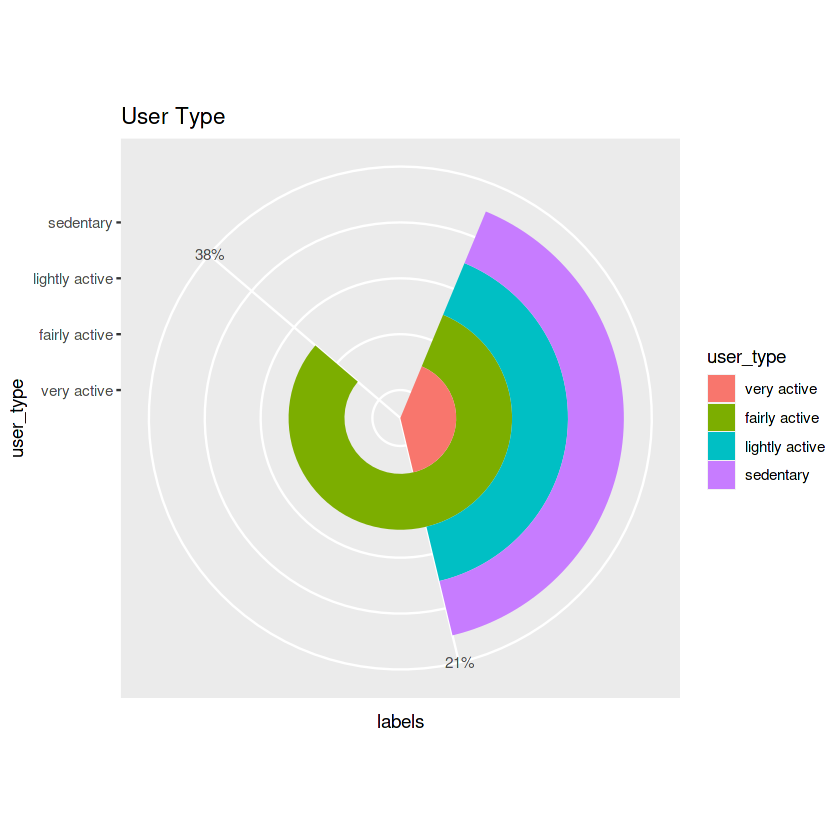

In [93]:
ggplot(user_type_percent, aes(x = user_type, y = labels, fill = user_type)) + geom_bar(width = 1, stat = "identity") + coord_polar("y", start = pi / 8) + ggtitle("User Type")

According to the total daily steps, we see that all types of users regularly use smart devices to track their daily activity.
With the majority, 38%, being fairly active.

In [94]:
 Sys.setlocale("LC_TIME", "C")

[1] "C"

In [95]:
weekday_steps_sleep <- daily_activity_sleep                                   
weekday_steps_sleep$weekday <- weekdays(weekday_steps_sleep$date)  

In [96]:
head(weekday_steps_sleep)

id         date       totalsteps totaldistance trackerdistance
1 1503960366 2016-04-12 13162      8.50          8.50           
2 1503960366 2016-04-13 10735      6.97          6.97           
3 1503960366 2016-04-15  9762      6.28          6.28           
4 1503960366 2016-04-16 12669      8.16          8.16           
5 1503960366 2016-04-17  9705      6.48          6.48           
6 1503960366 2016-04-19 15506      9.88          9.88           
  loggedactivitiesdistance veryactivedistance moderatelyactivedistance
1 0                        1.88               0.55                    
2 0                        1.57               0.69                    
3 0                        2.14               1.26                    
4 0                        2.71               0.41                    
5 0                        3.19               0.78                    
6 0                        3.53               1.32                    
  lightactivedistance sedentaryactivedistance veryactiveminutes
1 6.06                0                       25               
2 4.71                0                       21               
3 2.83                0                       29               
4 5.04                0                       36               
5 2.51                0                       38               
6 5.03                0                       50               
  fairlyactiveminutes lightlyactiveminutes sedentaryminutes calories
1 13                  328                  728              1985    
2 19                  217                  776              1797    
3 34                  209                  726              1745    
4 10                  221                  773              1863    
5 20                  164                  539              1728    
6 31                  264                  775              2035    
  totalsleeprecords totalminutesasleep totaltimeinbed weekday  
1 1                 327                346            Tuesday  
2 2                 384                407            Wednesday
3 1                 412                442            Friday   
4 2                 340                367            Saturday 
5 1                 700                712            Sunday   
6 1                 304                320            Tuesday

Hourly steps throughout the day 

In [97]:
weekday_steps_sleep <-weekday_steps_sleep%>%
  group_by(weekday) %>%
  summarize (daily_steps = mean(totalsteps), daily_sleep = mean(totalminutesasleep))

head(weekday_steps_sleep)

weekday  daily_steps daily_sleep
1 Friday   7901.404    405.4211   
2 Monday   9273.217    419.5000   
3 Saturday 9871.123    419.0702   
4 Sunday   7297.855    452.7455   
5 Thursday 8183.516    401.2969   
6 Tuesday  9182.692    404.5385

In [98]:
weekday_steps_sleep <- weekday_steps_sleep                                    
weekday_steps_sleep$weekday <- factor(weekday_steps_sleep$weekday,                
                  levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday","Saturday","Sunday"))

In [99]:
 Sys.setlocale("LC_TIME", "C")

[1] "C"

In [100]:
weekday_intensities <- intensities                                  
weekday_intensities$weekday <- weekdays(weekday_intensities$date) 

In [101]:
head(weekday_intensities)

id         time     totalintensity averageintensity date       weekday
1 1503960366 00:00:00 20             0.333333         2016-04-12 Tuesday
2 1503960366 01:00:00  8             0.133333         2016-04-12 Tuesday
3 1503960366 02:00:00  7             0.116667         2016-04-12 Tuesday
4 1503960366 03:00:00  0             0.000000         2016-04-12 Tuesday
5 1503960366 04:00:00  0             0.000000         2016-04-12 Tuesday
6 1503960366 05:00:00  0             0.000000         2016-04-12 Tuesday

In [102]:
weekday_intensities <-weekday_intensities%>%
  group_by(weekday) %>%
  summarize (hourly_intensity = mean(totalintensity))

head(weekday_intensities)

weekday  hourly_intensity
1 Friday   12.09309        
2 Monday   12.11220        
3 Saturday 12.90086        
4 Sunday   10.98377        
5 Thursday 11.92690        
6 Tuesday  12.44278

In [103]:
weekday_intensities <- weekday_intensities                                  
weekday_intensities$weekday <- factor(weekday_intensities$weekday,                
                  levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday","Saturday","Sunday"))

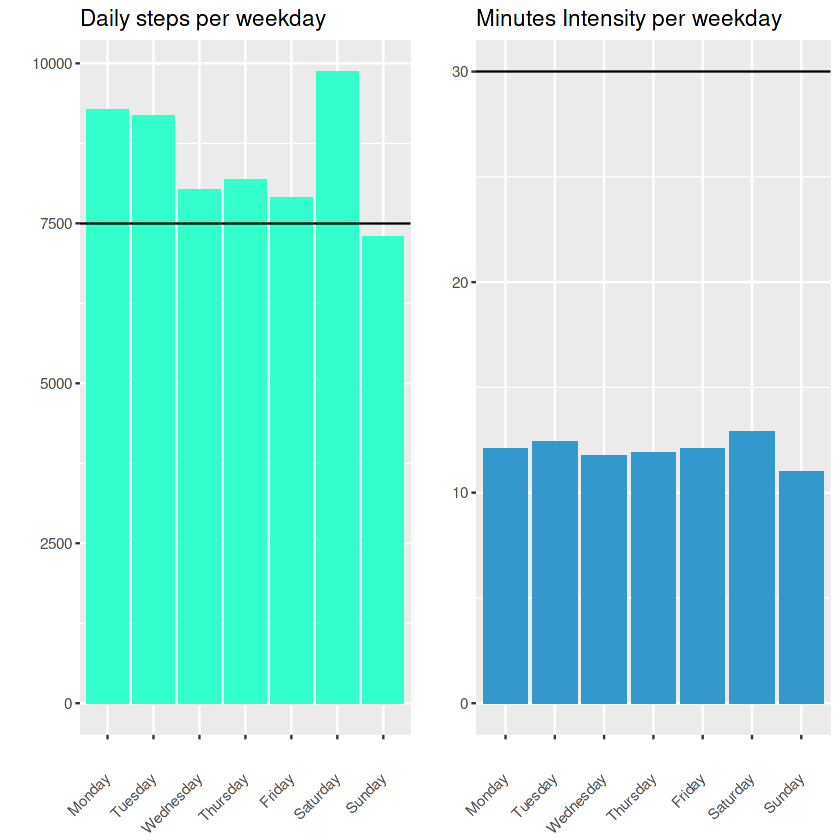

In [104]:
ggarrange(
  ggplot(weekday_steps_sleep) +
      geom_col(aes(weekday, daily_steps), fill = "#33ffcc") +
      geom_hline(yintercept = 7500) +
      labs(title = "Daily steps per weekday", x= "", y = "") +
      theme(axis.text.x = element_text(angle = 45,vjust = 0.5, hjust = 1)),
  ggplot(weekday_intensities)+
    geom_col(aes(weekday, hourly_intensity), fill = "#3399cc") +
      geom_hline(yintercept = 30) +
      labs(title = "Minutes Intensity per weekday", x= "", y = "") +
      theme(axis.text.x = element_text(angle = 45,vjust = 0.5, hjust = 1))
)

From the above graphs, we can conclude that on all days of the week, except for Sunday, the recommended levels of 7500 steps per day are reached. In contrast, when it comes to the recommended number of minutes of intensity per week (150 minutes), we observe that no such figures are achieved.

_Studies have tried to quantify how many steps are about equal to the [CDC's](https://www.cdc.gov/physicalactivity/basics/adults/) recommendation of 150 minutes of moderate exercise per week. Most research says 7,500 steps is about equal to the 150 minutes a week, although there's a lot of variability across individuals, so 7,500 is not an absolute amount._



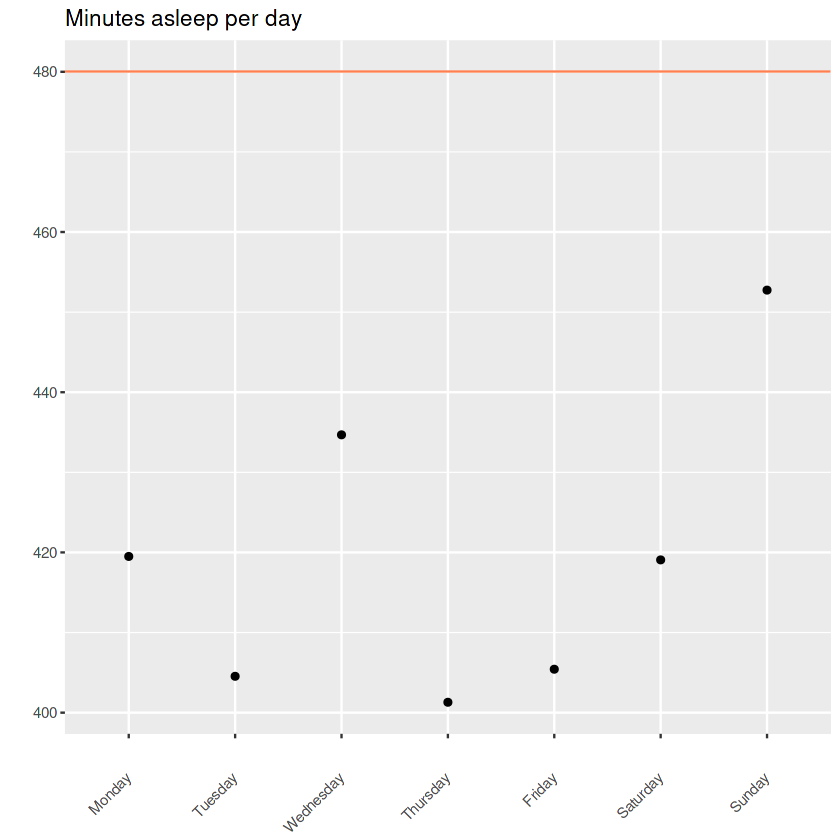

In [105]:
ggplot(weekday_steps_sleep, aes(weekday, daily_sleep)) +
      geom_point(fill = "#85e0e0") +
      geom_hline(yintercept = 480, color = "coral") +
      labs(title = "Minutes asleep per day", x= "", y = "") +
      theme(axis.text.x = element_text(angle = 45,vjust = 0.5, hjust = 1))

Regarding the sleep time per day, users don't sleep the recommended amount of 480 minutes/ 8 hours.
Curiously Wednesday and Sunday are the days with more minutes of sleep and with fewer daily steps.


Let´s find any relation between sleep and time of physical activity.

In [106]:
daily_activity_sleep <- daily_activity_sleep %>% mutate(totalactiveminutes = veryactiveminutes + fairlyactiveminutes + lightlyactiveminutes)

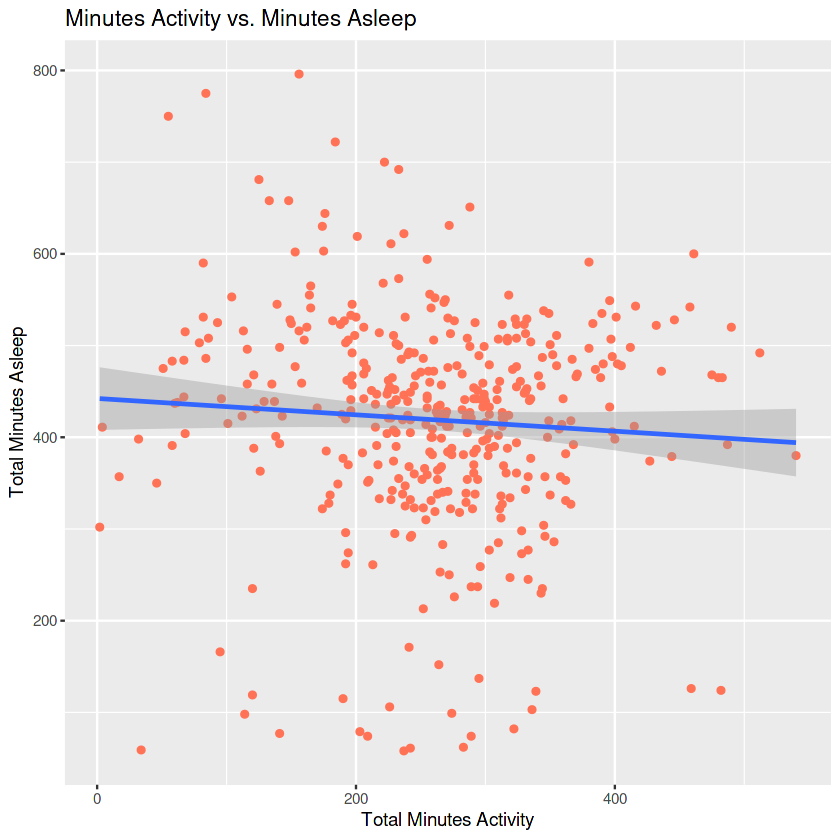

In [107]:
ggplot(data = daily_activity_sleep, aes(x = totalactiveminutes, y = totalminutesasleep)) + 
  geom_point(color = "coral1") + 
  geom_smooth(method = lm, formula = y ~ x) + 
  labs(title = "Minutes Activity vs. Minutes Asleep", x = "Total Minutes Activity", y = "Total Minutes Asleep")

In this case, there are no patterns evaluating the effects of physical activity interventions on sleep duration, though limited.

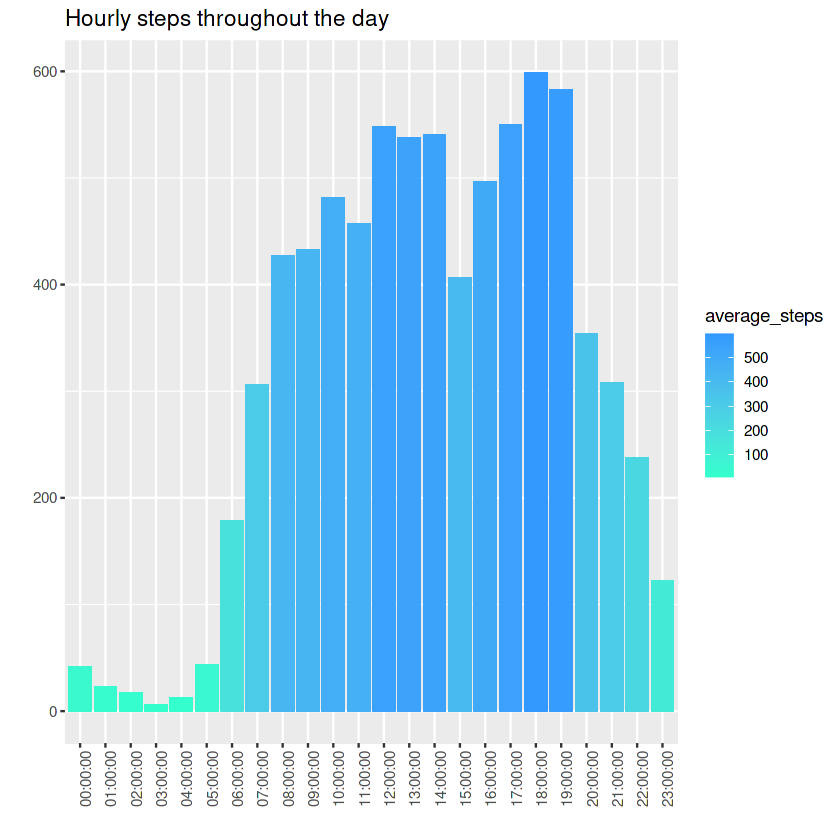

In [108]:
steps %>%
  group_by(time) %>%
  summarize(average_steps = mean(steptotal)) %>%
  ggplot() +
  geom_col(mapping = aes(x=time, y = average_steps, fill = average_steps)) + 
  labs(title = "Hourly steps throughout the day", x="", y="") + 
  scale_fill_gradient(low = "#33ffcc", high = "#3399ff")+
  theme(axis.text.x = element_text(angle = 90))

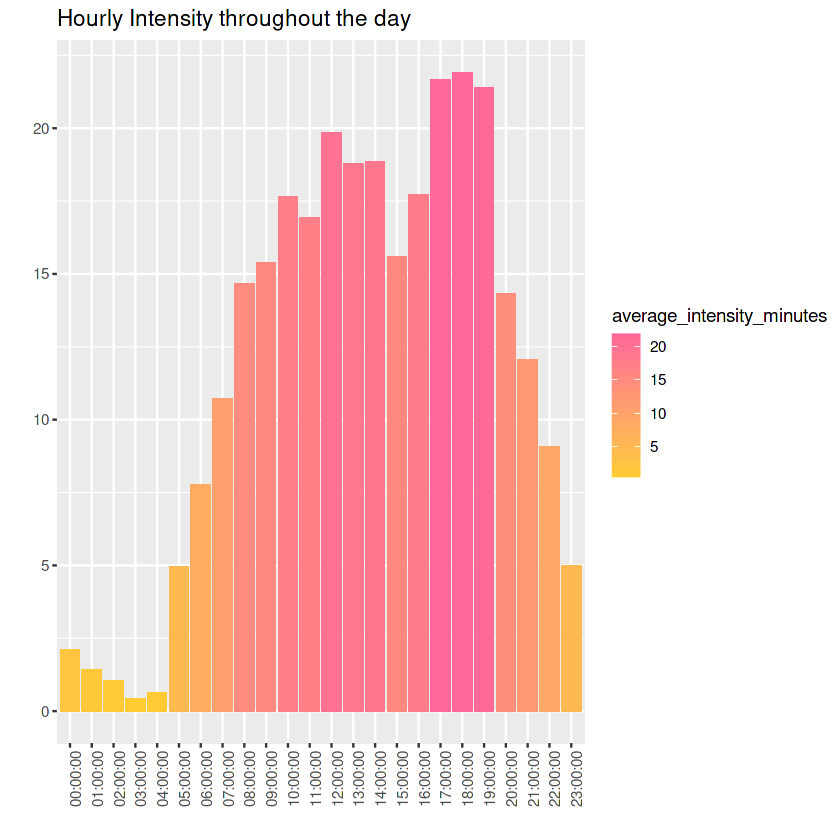

In [109]:
intensities %>%
  group_by(time) %>%
  summarize(average_intensity_minutes = mean(totalintensity)) %>%
  ggplot() +
  geom_col(mapping = aes(x=time, y = average_intensity_minutes, fill = average_intensity_minutes)) + 
  labs(title = "Hourly Intensity throughout the day", x="", y="") + 
  scale_fill_gradient(low = "#ffcc33", high = "#ff6699")+
  theme(axis.text.x = element_text(angle = 90))

As for the time of day with the highest number of steps and minutes of intensity, the preferred periods are between 12 and 14 hours and between 17 and 19 hours. This can be justified by the shape of the working day.


In [110]:
daily_calories <-calories%>%
  group_by(time) %>%
  summarize (hourly_calories = mean(calories))

head(daily_calories)

time     hourly_calories
1 00:00:00 71.80514       
2 01:00:00 70.16506       
3 02:00:00 69.18650       
4 03:00:00 67.53805       
5 04:00:00 68.26180       
6 05:00:00 81.70815

As we can see in the following graph, there is a direct correlation between the times of greatest calorie loss and the times of greatest physical activity, which we have also seen in the previous graphs.

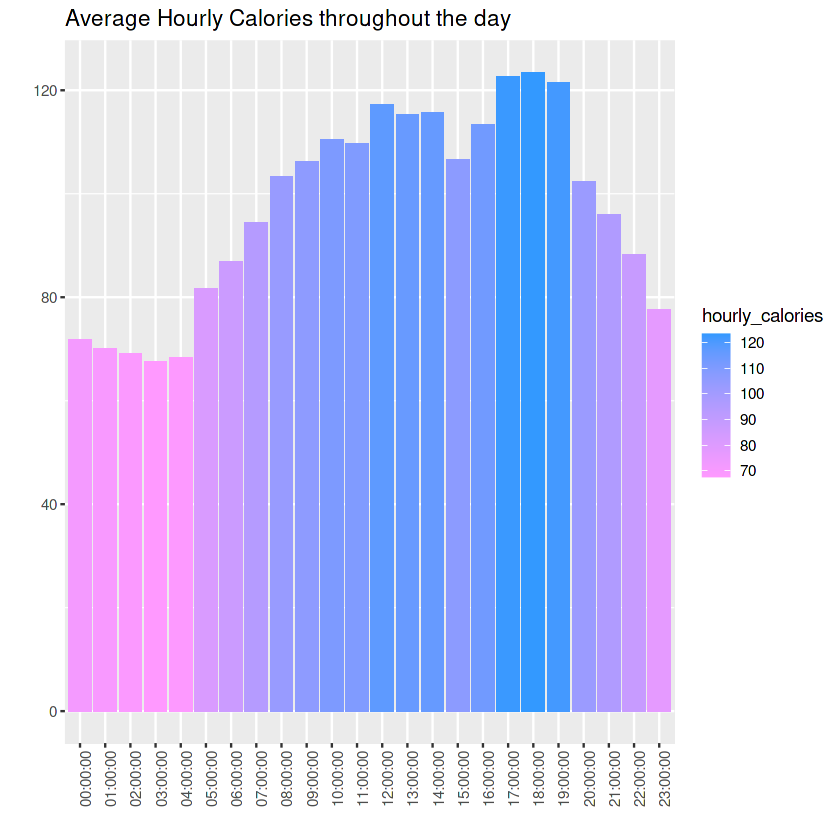

In [111]:
daily_calories %>%
  group_by(time) %>%
  ggplot() +
  geom_col(mapping = aes(x=time, y = hourly_calories, fill = hourly_calories)) + 
  labs(title = "Average Hourly Calories throughout the day", x="", y="") + 
  scale_fill_gradient(low = "#ff99ff", high = "#3399ff")+
  theme(axis.text.x = element_text(angle = 90))

# <span style="color:#ff9973"> Act Phase </span>

The dataset we used for our analysis contains some limitations. 

- A small sample size.
- Lack of demographic information such as age, race/ethnicity, education, marital status, and employment status (full time, part time, or not employed).
- Activity outdoors vs indoors.
- Body mass index.

These factors may lead to the risk of bias in the findings. 
To improve our response to Bellabeat's business case, we suggest starting by conducting a new data analysis using current Bellabeat users from [Ivy tracker](https://bellabeat.com/product/ivy/), as well as users of other smart device companies.

Considering the above limitations, we can keep in mind the following recommendations to improve the Bellabeat application:


##### Push notifications about daily activity 


Timing is such an important component in marketing. Yet, we tend to get the right message at the wrong time. This not only frustrates users. It also reduces the likelihood of completing a sale. 

For the [Bellabeat Coach](https://bellabeat.com/coach/) users:

- We recommend sending push notifications on a daily basis, before the start of daily physical activity. By sending push notifications we can increase app traffic and the subscriber base.

For all other users:

- 3-4 times a week. Daily reminders are acceptable only when suggesting a daily fitness program.

The goal of determining the correct frequency for push notifications is to prevent advertising fatigue, brand blindness, or accidental user harassment.


#### Set a bedtime & wake-up time


- To manage a consistent sleep schedule and prepare for bed based on the recommendations to ensure 8 hours' sleep a day, the user sets her desired wake-up time and the app sends a notification 8.5 hours before. 

The frequency of push notifications is the same as in the previous point.


#### Bellabeat Coach, entirely free for the first month

- We recommend first month's subscription offer for the Bellabeat Coach. 
This way all users get to experience the features of the premium version and the benefits of having a personal wellness assistant.
 

#### Bellabeat's Makes Clever Marketing 


- We recommend a Loyalty Program. The app give customers a chance to earn points for every week of reached goals. These points can generate discounts on products available in the [Shop](https://bellabeat.com/catalog/) section.



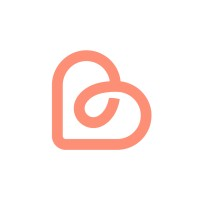

##      Empowering Women to Unlock Their Full Potential